<a href="https://colab.research.google.com/github/moexalgo/moexalgo.github.io/blob/main/examples/library-examples/candles-example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Получение свечей из Algopack через библиотеку moexalgo

В качестве примера выгрузим исторические дневные свечи по акциям Сбербанка (SBER) за весь 2025 год с использованием библиотеки moexalgo и API Algopack

### Зачем это может быть нужно
Дневные свечи — это основа для технического анализа и бэктестинга торговых стратегий. Они содержат цены открытия, закрытия, максимум, минимум и объём торгов за день.

### Описание метода API
Метод candles() библиотеки moexalgo позволяет получать исторические свечи с различными таймфреймами:

*   1min, 10min, 1h, 1d (день), 1w (неделя), 1m (меясц)

Особенности и ограничения:

*   Лимит на выдачу данных: 10000 строк
*   Данные доступны с момента листинга инструмента на бирже (чаще всего)
*   Большие периоды нужно делить на меньшие

In [ ]:
# Установка библиотеки (если еще не установлена)
#!pip install moexalgo

from moexalgo import Ticker, session
import pandas as pd

# Авторизация (замените на ваш токен из личного кабинета https://data.moex.com/products/algopack)
session.TOKEN = 'eyJhbGciOiJSUzI1NiIsInR5cCIgOiAiS...ваш_токен'

# Создаем объект тикера
sber = Ticker('SBER')

# Получаем дневные свечи за 2025 год
candles_data = sber.candles(
    start='2025-01-01',    # Начальная дата
    end='2025-12-31',      # Конечная дата
    period='1d'            # Дневные свечи
)

# Преобразуем в DataFrame для удобной работы
df = pd.DataFrame(candles_data)

# Выводим общую информацию о данных
print(f"Всего получено записей: {len(df)}")
print(f"Период: с {df['begin'].min()} по {df['end'].max()}")

# Сохраняем данные в CSV файл (опционально)
df.to_csv('sber_candles_2025.csv', index=False)
print("Данные сохранены в файл sber_candles_2025.csv")


Всего получено записей: 318
Период: с 2025-01-03 00:00:00 по 2025-12-30 23:59:58
Данные сохранены в файл sber_candles_2025.csv


In [12]:
df

,open,close,high,low,value,volume,begin,end
0,280.00,272.25,280.41,271.80,1.185357e+10,43086870,2025-01-03 00:00:00,2025-01-03 23:59:59
1,270.88,274.37,274.41,270.07,7.737094e+09,28454750,2025-01-06 00:00:00,2025-01-06 23:59:59
2,273.07,277.00,277.87,273.07,7.356165e+09,26634660,2025-01-08 00:00:00,2025-01-08 23:59:59
3,276.71,271.80,278.77,270.73,1.449133e+10,52952880,2025-01-09 00:00:00,2025-01-09 23:59:59
4,272.31,278.77,279.53,270.27,1.962313e+10,71154220,2025-01-10 00:00:00,2025-01-10 23:59:59
...,...,...,...,...,...,...,...,...
313,300.26,302.51,302.60,300.02,7.471306e+09,24760307,2025-12-26 00:00:00,2025-12-26 23:59:58
314,302.66,302.63,303.20,302.51,5.536735e+08,1827803,2025-12-27 00:00:00,2025-12-27 23:59:57
315,302.60,302.55,302.83,301.37,9.408030e+08,3113900,2025-12-28 00:00:00,2025-12-28 23:59:57
316,303.00,299.70,306.20,298.50,1.568448e+10,51927078,2025-12-29 00:00:00,2025-12-29 23:59:59


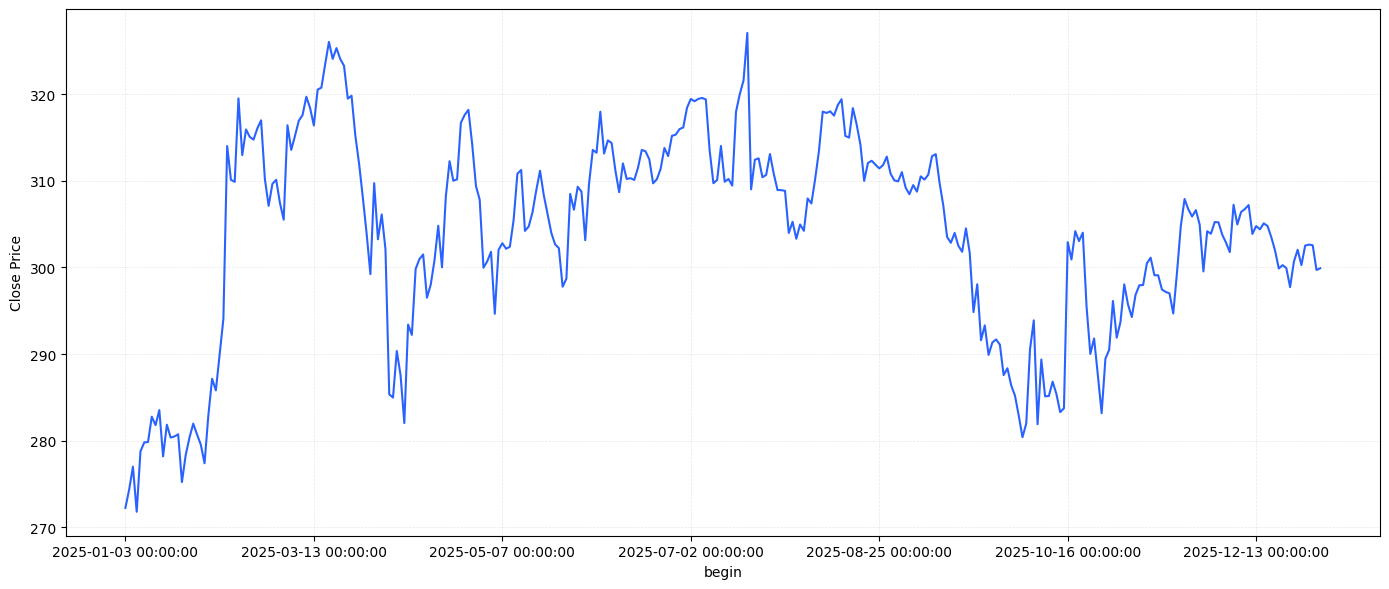

In [ ]:
# Установка библиотеки (если еще не установлена)
#!pip install matplotlib

import matplotlib.pyplot as plt

ax = df.set_index('begin')['close'].plot(figsize=(14, 6), color='#2962FF', linewidth=1.5)
ax.grid(alpha=0.3, linestyle='--', linewidth=0.5)
ax.set_ylabel('Цена')
plt.tight_layout()
plt.show()